In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
# print(type(df))

perch_full = df.to_numpy()
print(type(perch_full))
# print(df.shape)
# df.head()
print(np.shape(perch_full))

<class 'numpy.ndarray'>
(56, 3)


In [62]:
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

print(np.shape(perch_weight))

(56,)


In [63]:
from sklearn.model_selection import train_test_split

In [64]:
train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state = 42)

In [65]:
## polynomial trandform
from sklearn.preprocessing import PolynomialFeatures

In [66]:
poly = PolynomialFeatures(degree = 3)

poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[ 1.,  2.,  3.,  4.,  6.,  9.,  8., 12., 18., 27.]])

In [67]:
poly = PolynomialFeatures(degree = 3, include_bias=False)

poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [68]:
# print(train_poly[:10])
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3']

In [69]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()  

lr.fit(train_poly, train_target)

LinearRegression()

In [70]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.996387234098009
0.9410534492221257


In [71]:
#Regression 하는이유 overfitting 을 하지않기 하기위하여 사용된다

In [72]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [73]:
print(train_poly.shape)

(42, 55)


In [74]:
lr = LinearRegression()

In [75]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999938143
-144.40744532797535


In [76]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [77]:
from sklearn.linear_model import Ridge  ## Ridge 릿지

ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [78]:
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615386


In [79]:
train_score = []
test_score = []

In [80]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

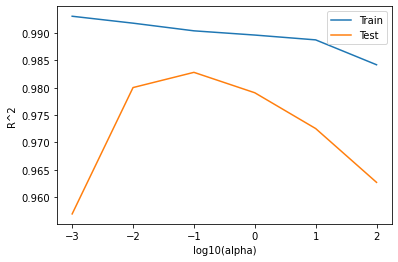

In [85]:
plt.plot(np.log10(alpha_list), train_score, label = 'Train')
plt.plot(np.log10(alpha_list), test_score, label = 'Test')
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [86]:
from sklearn.linear_model import Lasso

In [87]:
lasso = Lasso()
lasso.fit(train_scaled, train_target)

Lasso()

In [88]:
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


In [94]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\82104\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792032, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\82104\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345401393, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


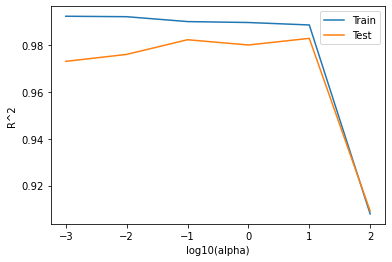

In [95]:
plt.plot(np.log10(alpha_list), train_score, label = 'Train')
plt.plot(np.log10(alpha_list), test_score, label = 'Test')
plt.xlabel('log10(alpha)')
plt.ylabel('R^2')
plt.legend()
plt.show()

In [96]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [97]:
np.sum(lasso.coef_ != 0)

15